<a href="https://colab.research.google.com/github/vedharshita/Detecting-Mental-Workload-in-Virtual-Reality/blob/main/1_EDA%2BSplitFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Detecting Cognitive Workload Using Fourier Transform (FFT) and Power Spectral Density (PSD) on Wireless EEG Spectral Data***

---


The study aims to build upon the [prior work](https://www.frontiersin.org/articles/10.3389/fnhum.2019.00401/full) and to classify mental workload levels in VR from EEG signals. The study investigated the possibility of categorizing cognitive workload using EEG signals while doing a classic n-back task in an interactive VR environment, leveraging state-of-the-art machine learning and deep learning models like SVM, Random Forest, LSTM.

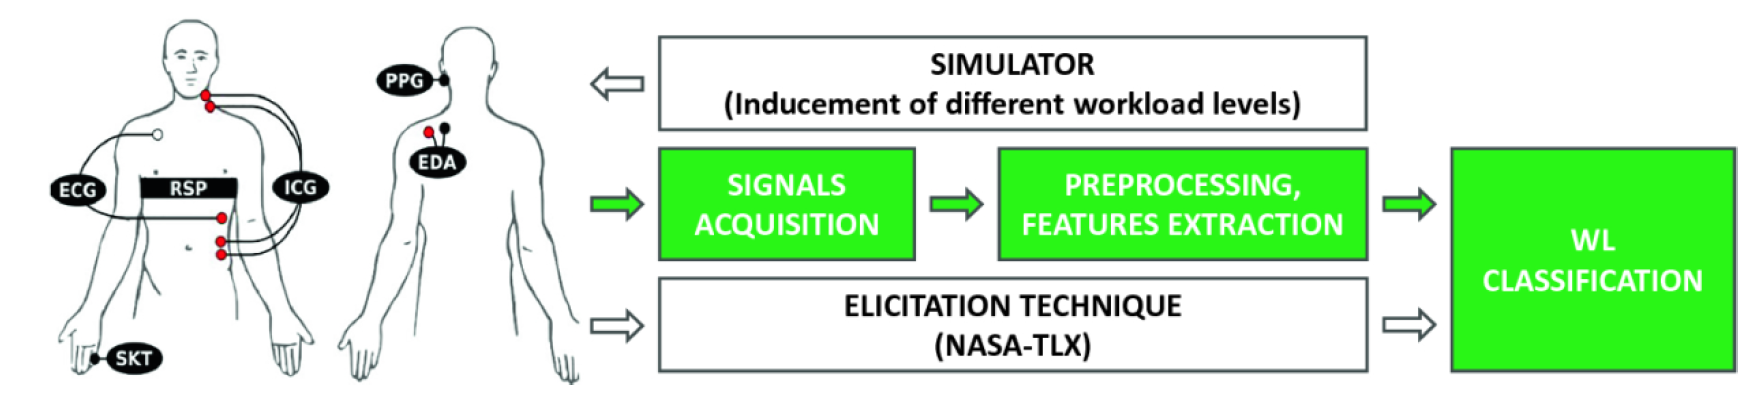

### **STEP 1: RAW DATA LOADING AND EXPLORATION**

The dataset used in this paper comes from [prior work](https://www.frontiersin.org/articles/10.3389/fnhum.2019.00401/full) and was collected to estimate cognitive workload classification, with various users EEG signal measurements while performing n back tasks in a virtual environment. 

**Given Raw Data Format:** = .mat files

**Given Raw Data Path:** = "/content/gdrive/MyDrive/VR Mental Workload/data/VRData2019"

In [ ]:
## Mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## Import Statements
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import warnings
import random
import os
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [ ]:
## Setting path for data files on colab
root_dir = "/content/gdrive/MyDrive/VR Mental Workload/"
raw_dir = root_dir + "data/VRData2019/"
csv_dir = raw_dir + "csv/"
nback_dir = raw_dir + "nback_csv/"
scaled_nback_dir = raw_dir + "scaled_nback_dir/"
features_csv_dir = raw_dir + "features_csv/"
norm_feat_csv_dir = raw_dir + "norm_feat_csv_dir/"
model_file_dir = raw_dir + "model_file_dir/"
os.chdir(raw_dir)

In [ ]:
## Loading .mat files and creating raw csv's, nback split csv's and Scaled csv's from original .mat files
def read_matfiles():
  lst0 = sorted(os.listdir())
  lst1 = []
  scaler = MinMaxScaler()
  for file in lst0:
    if file.endswith(".mat"):
      f1 = loadmat(file)
      df1 = pd.DataFrame(f1['bin'], columns = ['bin'])
      df2 = pd.DataFrame(f1['color'], columns = ['color'])
      df3 = pd.DataFrame(f1['spawn'], columns = ['spawn'])
      df4 = pd.DataFrame(f1['ntrial'], columns = ['ntrial'])
      df5 = pd.DataFrame(f1['nback'], columns = ['nback'])
      df6 = pd.DataFrame(f1['hand1'], columns = ['hand1_x', 'hand1_y', 'hand1_z'])
      df7 = pd.DataFrame(f1['hand2'], columns = ['hand2_x', 'hand2_y', 'hand2_z'])
      df8 = pd.DataFrame(f1['head'], columns = ['head_x', 'head_y', 'head_z'])
      df9 = pd.DataFrame(f1['signal'], columns = ['signal_1', 'signal_2', 'signal_3', 'signal_4', 'signal_5', 'signal_6', 'signal_7', 'signal_8'])

      merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)
      merged_df.to_csv(csv_dir + os.path.splitext(file)[0] + '.csv')
      
      ## Split dataframe based on nback
      grouped = merged_df.groupby(merged_df.nback)
      nback0 = grouped.get_group(0)
      nback1 = grouped.get_group(1)
      nback2 = grouped.get_group(2)

      nback0.to_csv(nback_dir + os.path.splitext(file)[0] + '_nback0.csv')
      nback1.to_csv(nback_dir + os.path.splitext(file)[0] + '_nback1.csv')
      nback2.to_csv(nback_dir + os.path.splitext(file)[0] + '_nback2.csv')

      ## Min Max Scaling 
      scaled_nback0 = scaler.fit_transform(nback0[nback0.columns[14:]])
      scaled_nback1 = scaler.fit_transform(nback1[nback1.columns[14:]])
      scaled_nback2 = scaler.fit_transform(nback2[nback2.columns[14:]])

      scaled_nback0 = pd.DataFrame(scaled_nback0, columns= nback0.columns[14:])
      scaled_nback1 = pd.DataFrame(scaled_nback1, columns= nback1.columns[14:])
      scaled_nback2 = pd.DataFrame(scaled_nback2, columns= nback2.columns[14:])

      scaled_nback0.reset_index(drop=True, inplace=True)
      scaled_nback1.reset_index(drop=True, inplace=True)
      scaled_nback2.reset_index(drop=True, inplace=True)
      nback0.reset_index(drop=True, inplace=True)
      nback1.reset_index(drop=True, inplace=True)
      nback2.reset_index(drop=True, inplace=True)

      scaled_nback0 = pd.concat([nback0[nback0.columns[:14]], scaled_nback0], axis=1)
      scaled_nback1 = pd.concat([nback1[nback1.columns[:14]], scaled_nback1], axis=1)
      scaled_nback2 = pd.concat([nback2[nback2.columns[:14]], scaled_nback2], axis=1)

      print(file,scaled_nback0.shape, nback0.shape)
      print(file,scaled_nback1.shape, nback1.shape)
      print(file,scaled_nback2.shape, nback2.shape)

      scaled_nback0.to_csv(scaled_nback_dir + os.path.splitext(file)[0] + '_scaled_nback0.csv')
      scaled_nback1.to_csv(scaled_nback_dir + os.path.splitext(file)[0] + '_scaled_nback1.csv')
      scaled_nback2.to_csv(scaled_nback_dir + os.path.splitext(file)[0] + '_scaled_nback2.csv')
      lst1.append(merged_df)
  return lst1

mat = read_matfiles()

S01.mat (77984, 22) (77984, 22)
S01.mat (78024, 22) (78024, 22)
S01.mat (77976, 22) (77976, 22)
S02.mat (77496, 22) (77496, 22)
S02.mat (78016, 22) (78016, 22)
S02.mat (78000, 22) (78000, 22)
S03.mat (77936, 22) (77936, 22)
S03.mat (78016, 22) (78016, 22)
S03.mat (78999, 22) (78999, 22)
S04.mat (79007, 22) (79007, 22)
S04.mat (78000, 22) (78000, 22)
S04.mat (78025, 22) (78025, 22)
S05.mat (78040, 22) (78040, 22)
S05.mat (78027, 22) (78027, 22)
S05.mat (78983, 22) (78983, 22)
S06.mat (78991, 22) (78991, 22)
S06.mat (78016, 22) (78016, 22)
S06.mat (78024, 22) (78024, 22)
S07.mat (79031, 22) (79031, 22)
S07.mat (78000, 22) (78000, 22)
S07.mat (78024, 22) (78024, 22)
S08.mat (78000, 22) (78000, 22)
S08.mat (78016, 22) (78016, 22)
S08.mat (77992, 22) (77992, 22)
S09.mat (78000, 22) (78000, 22)
S09.mat (79015, 22) (79015, 22)
S09.mat (78032, 22) (78032, 22)
S10.mat (79031, 22) (79031, 22)
S10.mat (78008, 22) (78008, 22)
S10.mat (77984, 22) (77984, 22)
S11.mat (77992, 22) (77992, 22)
S11.mat 


#### Each file contains the following variables: (22 features)
**signal:** RAW 8-channel EEG : F3, Fz, F4, C3, C4, P3, Pz, P4

**color:** The color of the current ball (coded 1-5)

**bin:** The bin (left or right) the ball was placed into for a trial (coded 1 and 2)

**nback:** Difficutly level of the current trial (coded 0-2)

**ntrial:** Current trial number

**spawn:** Changes from 0 to 1 when a ball appears

**hand1 & hand2:** 3-axis hand controller accelerometer data

**head:** 3-axis headset accelerometer data

In [ ]:
## One participant's data view out of 15
mat[14]

,bin,color,spawn,ntrial,nback,hand1_x,hand1_y,hand1_z,hand2_x,hand2_y,hand2_z,head_x,head_y,head_z,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8
0,0,4,1,1,2,1544,-920,-9,1051,238,18,1231,622,-41,19.228,8.018,2.413,1.482,9.386,4.503,5.453,-3.249
1,0,4,0,1,2,1544,-920,-9,1051,238,18,1231,622,-41,24.396,14.611,11.704,12.103,20.007,7.163,9.443,5.434
2,0,4,0,1,2,1544,-920,-9,1051,238,18,1231,622,-41,15.257,8.778,7.277,-6.631,13.832,-0.893,1.995,1.387
3,0,4,0,1,2,1544,-920,-9,1051,238,18,1231,622,-41,9.937,0.988,-0.931,3.078,1.995,11.381,3.496,-10.849
4,0,4,0,1,2,1544,-920,-9,1051,238,18,1231,622,-41,3.021,3.249,-1.121,-5.016,-0.950,9.842,-2.527,-18.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234035,1,0,0,228,0,1544,-920,-9,957,285,64,1281,611,-59,-0.247,3.534,0.456,6.460,-4.256,5.605,6.270,3.097
234036,1,0,0,228,0,1544,-920,-9,957,285,64,1281,611,-59,3.192,-0.114,-6.973,6.004,-6.175,5.244,8.284,3.553
234037,1,0,0,228,0,1544,-920,-9,957,285,64,1281,611,-59,2.356,-0.513,-10.602,7.961,-7.486,-2.280,-1.102,-5.510
234038,1,0,0,228,0,1544,-920,-9,957,285,64,1281,611,-59,-2.584,0.912,-7.315,4.313,-2.907,9.595,9.823,6.384


In [ ]:
## Displaying Data Types
mat[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233984 entries, 0 to 233983
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   bin       233984 non-null  uint8  
 1   color     233984 non-null  uint8  
 2   spawn     233984 non-null  uint8  
 3   ntrial    233984 non-null  uint8  
 4   nback     233984 non-null  uint8  
 5   hand1_x   233984 non-null  int16  
 6   hand1_y   233984 non-null  int16  
 7   hand1_z   233984 non-null  int16  
 8   hand2_x   233984 non-null  int16  
 9   hand2_y   233984 non-null  int16  
 10  hand2_z   233984 non-null  int16  
 11  head_x    233984 non-null  int16  
 12  head_y    233984 non-null  int16  
 13  head_z    233984 non-null  int16  
 14  signal_1  233984 non-null  float64
 15  signal_2  233984 non-null  float64
 16  signal_3  233984 non-null  float64
 17  signal_4  233984 non-null  float64
 18  signal_5  233984 non-null  float64
 19  signal_6  233984 non-null  float64
 20  sign

In [ ]:
## Displaying raw Data Size for each participant
for i in range(0,15):
  print(mat[i].shape)

(233984, 22)
(233512, 22)
(234951, 22)
(235032, 22)
(235050, 22)
(235031, 22)
(235055, 22)
(234008, 22)
(235047, 22)
(235023, 22)
(234016, 22)
(233960, 22)
(235056, 22)
(234056, 22)
(234040, 22)


In [ ]:
## Checking nulls in data for each participant
for i in range(0,15):
  print(mat[i].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


To sum up: We have 15 participants performing n-back task (0,1, or 2) in 3 block chunks in randomized order. Each block is either 0-back, 1-back or 2-back. 

They first practice for 5 minute for each block in 4 runs followed by actual experimental run consisting of 20 balls in 4 second time.

This gave us 3 conditions * 20 balls * 4 second time = 240 Trials i.e. 240 seconds of recording = 4 minutes. But due to a software issue the last trial of each run was excluded from the analysis. Hence we are left with 228 trials i.e. 3.8 minutes of recording. 

In [ ]:
## Making 1 dataframe for EDA 
for i in range(1,16):
  mat[i-1]['Participant'] = i
sig_df = pd.concat([mat[0].iloc[:,:], mat[1].iloc[:,:], mat[2].iloc[:,:], mat[3].iloc[:,:], mat[4].iloc[:,:], mat[5].iloc[:,:], mat[6].iloc[:,:], mat[7].iloc[:,:], mat[8].iloc[:,:],mat[9].iloc[:,:],mat[10].iloc[:,:],mat[11].iloc[:,:],mat[12].iloc[:,:],mat[13].iloc[:,:],mat[14].iloc[:,:]], axis=0)
# sig_df = sig_df.reindex(columns=['Participant','ntrial','spawn','signal_1','signal_2','signal_3','signal_4','signal_5','signal_6','signal_7','signal_8','nback','hand1_x','hand1_y','hand1_z','hand2_x','hand2_y','hand2_z','head_x','head_y','head_z','color','bin'])
sig_df.head(5)

,bin,color,spawn,ntrial,nback,hand1_x,hand1_y,hand1_z,hand2_x,hand2_y,hand2_z,head_x,head_y,head_z,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,Participant
0,0,2,1,1,2,1544,-920,-9,1012,-194,29,1143,598,-63,24.035,-5.681,-3.686,6.213,-13.034,-0.722,0.627,2.128,1
1,0,2,0,1,2,1544,-920,-9,1012,-194,29,1143,598,-63,10.716,-8.949,-14.212,2.793,-14.592,-6.403,-4.218,-4.484,1
2,0,2,0,1,2,1544,-920,-9,1012,-194,29,1143,598,-63,5.453,-12.825,-16.853,-16.093,-17.328,-27.417,-14.858,-10.659,1
3,0,2,0,1,2,1544,-920,-9,1012,-194,29,1143,598,-63,14.972,-11.571,-22.477,-4.028,-18.658,-24.643,-11.818,-10.355,1
4,0,2,0,1,2,1544,-920,-9,1012,-194,29,1143,598,-63,25.460,-4.579,4.370,8.246,-13.281,-3.933,-7.733,-1.368,1


In [ ]:
## Describing 8 signals
pd.set_option('display.float_format', lambda x: '%.1f' % x)
sig_df[sig_df.columns].describe()

,bin,color,spawn,ntrial,nback,hand1_x,hand1_y,hand1_z,hand2_x,hand2_y,hand2_z,head_x,head_y,head_z,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,Participant
count,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0,3517821.0
mean,0.7,1.2,0.0,114.2,1.0,1265.6,-170.4,114.2,1196.9,-217.5,6.7,1206.1,664.3,-29.3,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,8.0
std,0.7,1.7,0.0,66.0,0.8,299.4,549.9,169.9,353.9,598.0,156.5,95.8,97.8,35.5,43.9,33.0,41.9,29.7,31.2,30.8,30.2,30.6,4.3
min,0.0,0.0,0.0,0.0,0.0,0.0,-949.0,-628.0,0.0,-949.0,-712.0,0.0,0.0,-254.0,-622.5,-622.3,-622.0,-622.4,-621.9,-622.6,-620.2,-622.4,1.0
25%,0.0,0.0,0.0,57.0,0.0,952.0,-920.0,-9.0,886.0,-920.0,-10.0,1122.0,610.0,-47.0,-14.2,-11.7,-13.3,-10.4,-10.6,-9.6,-9.7,-10.1,4.0
50%,1.0,0.0,0.0,114.0,1.0,1398.0,79.0,84.0,1023.0,139.0,1.0,1205.0,646.0,-27.0,-0.4,-0.5,-0.2,-0.3,-0.2,-0.1,-0.1,0.1,8.0
75%,1.0,2.0,0.0,171.0,2.0,1544.0,280.0,240.0,1544.0,325.0,70.0,1287.0,748.0,-10.0,13.0,10.3,12.2,9.9,10.1,9.7,9.8,10.0,12.0
max,2.0,5.0,1.0,228.0,2.0,1792.0,563.0,718.0,1871.0,714.0,795.0,1434.0,898.0,163.0,622.3,622.3,622.4,622.4,622.6,622.5,621.7,622.6,15.0


In [ ]:
sig_df.shape

(3517821, 23)

### **STEP 2: EXPLORATORY DATA ANALYSIS ON RAW DATA**

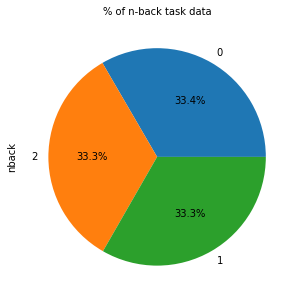

In [ ]:
## Plot 1, % of n-back tasks
plt.figure( figsize=(5,5))
sig_df['nback'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("% of n-back task data",fontsize=10)
plt.show()

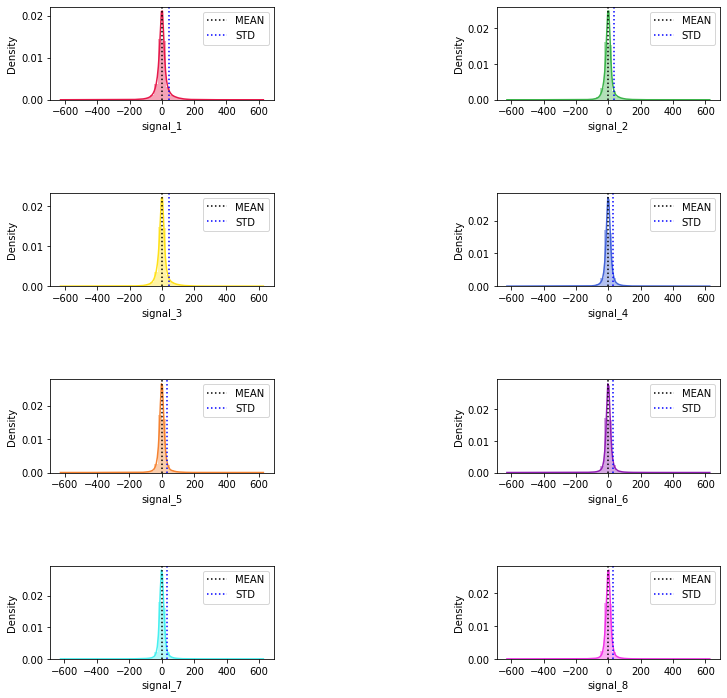

In [ ]:
## Plot 2, Mean and STD of signals throughout the participants
length  = 8
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6']
plt.figure(figsize=(12,12))
for i,j,k in itertools.zip_longest(sig_df.columns[14:22],range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(sig_df[i],color=k)
    plt.subplots_adjust(hspace = 1, wspace = 1)
    plt.axvline(sig_df[i].mean(),color = "k",linestyle="dotted",label="MEAN")
    plt.axvline(sig_df[i].std(),color = "b",linestyle="dotted",label="STD")
    plt.legend(loc="upper right")
plt.show()    

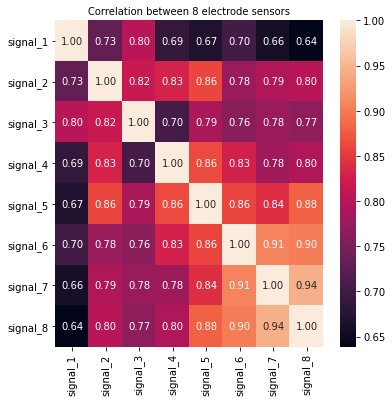

In [ ]:
## Plot 3, Correlations within signals
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
sns.heatmap(sig_df[sig_df.columns[14:22]].corr(), annot=True, fmt=".2f")
plt.title("Correlation between 8 electrode sensors",fontsize=10)
plt.show()

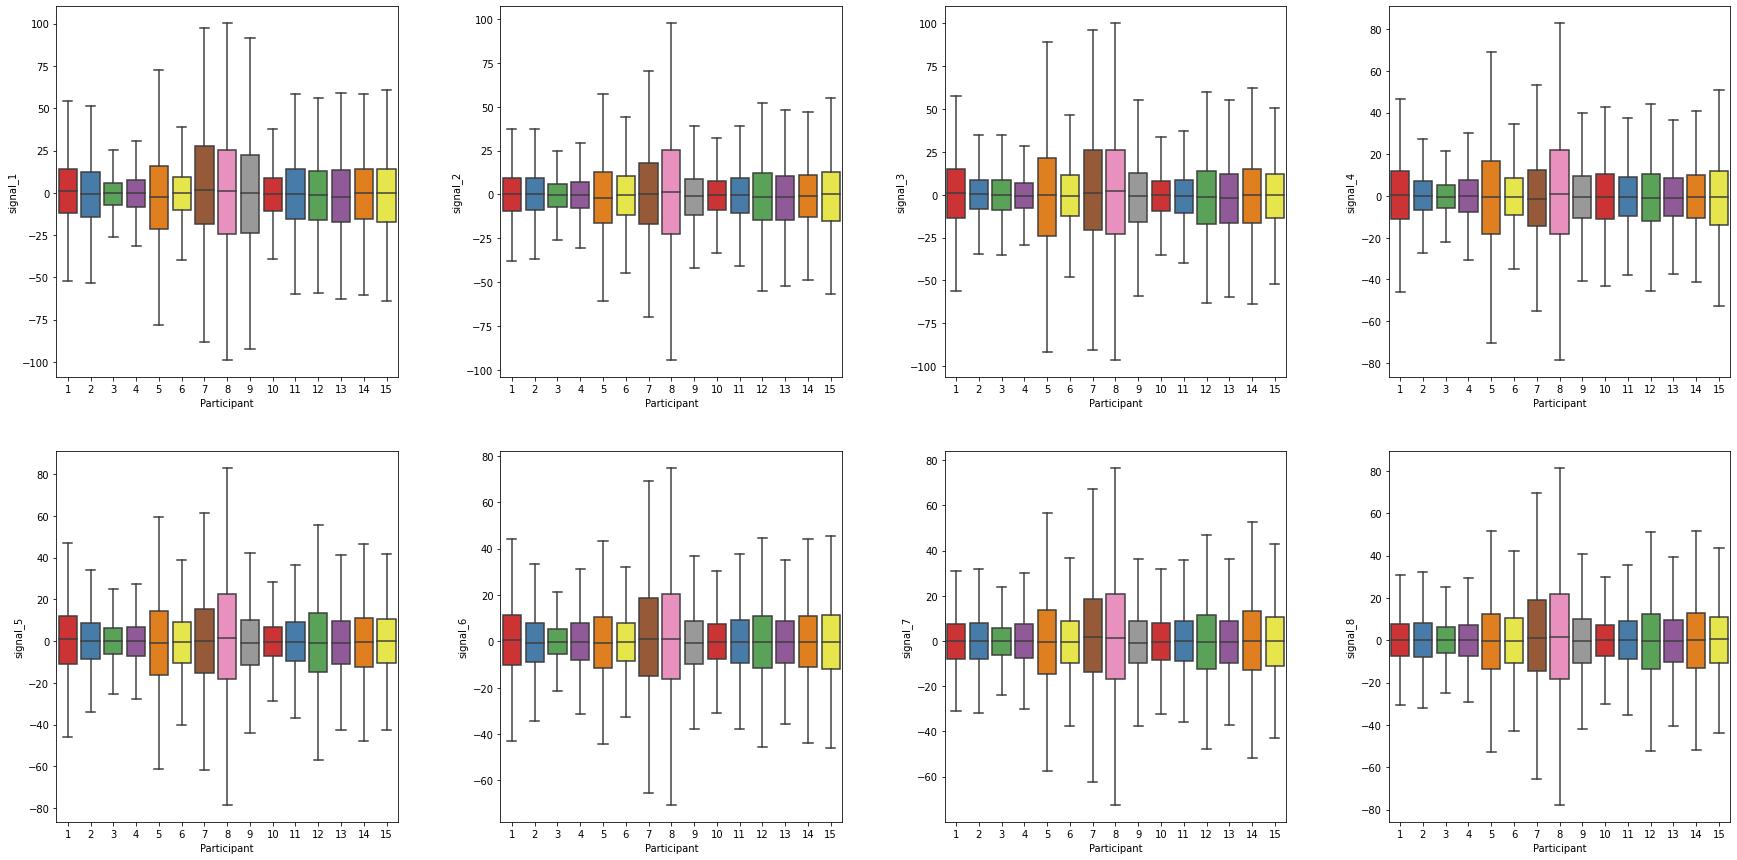

In [ ]:
## Plot 4, Boxplots for signal distribution across participants
fig, axes = plt.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(30)
plt.subplots_adjust(hspace = 0.2, wspace = 0.3)
for name, ax in zip(sig_df.columns[14:22], axes.flatten()):
    sns.boxplot(y=name, x= "Participant", data=sig_df, palette="Set1", ax=ax, showfliers = False)

### **STEP 3: FEATURES CREATION**

Electroencephalography (EEG) is a method for measuring the electrical activity in the brain by placing electrodes on the scalp.  Typically, the signal measured is made up of different types of brain activity which are characterised by their frequency.

**Delta < 4Hz, = Deep sleep**

**Theta 4-8Hz, = Light sleep**

**Alpha 8-14Hz, = Awake with eyes closed**

**Beta 14-30Hz, = Awake and thinking, interacting, doing calculations, etc.**

**Gamma > 30Hz, = Might be related to conciousness and/or perception (particular 40 Hz)**

For each signal for 15 participants we need to extract these 5 features for better analysis. Resulting in 54 features in total for each participant where **nback** is the target variable. This is done below:

In [ ]:
## https://dsp.stackexchange.com/questions/45345/how-to-correctly-compute-the-eeg-frequency-bands-with-python
## To extract PSD features from raw EEG data (per channel) -- 256 Hz sampling frequency
df_eeg = pd.DataFrame()
def get_PSD_per_second(raw_data, fs):
  global df_eeg

  # Get real amplitudes of FFT (only in postive frequencies)
  fft_vals = np.absolute(np.fft.rfft(raw_data))

  # Get frequencies for amplitudes in Hz
  fft_freq = np.fft.rfftfreq(len(raw_data), 1.0/fs)

  # Define EEG bands
  eeg_bands = {'Delta': (0, 4),'Theta': (4, 8), 'Alpha': (8, 14), 'Beta': (14, 30), 'Gamma': (30, 60)}

  # Take the mean of the fft amplitude for each EEG band
  eeg_band_fft = dict()
  for band in eeg_bands:
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

  # Temp df to store
  df = pd.DataFrame(columns=['band', 'val'])
  df['band'] = eeg_bands.keys()
  df['val'] = [eeg_band_fft[band] for band in eeg_bands]
  df_eeg = df_eeg.append(pd.Series(pd.Series(df["val"].values, index = df["band"].values), index = df["band"].values), 
                        ignore_index = True)

In [ ]:
## Needed to chunk the signals into groups of 256 data points (per second)
def chunks(l, n): 
  return [l[x: x+n] for x in range(0, len(l), n)]

In [ ]:
## Getting features for all participants for each nback level
fs = 256
df_final = pd.DataFrame()
os.chdir(nback_dir)
lst0 = sorted(os.listdir())
scaler = MinMaxScaler()
for file in lst0:
  os.chdir(nback_dir)
  file_df = pd.read_csv(file)
  print(file)
  for (channel, columnData) in file_df[file_df.columns[15:]].iteritems():
    for chunk in chunks(columnData.values, fs):
      chunk_array = np.array(chunk, dtype = float)
      get_PSD_per_second(chunk_array, fs)
  
    df_eeg = df_eeg.rename(columns = {"Delta": channel + "_Delta",
                                "Theta": channel + "_Theta",
                                 "Alpha": channel + "_Alpha",
                                "Beta": channel + "_Beta",
                                 "Gamma": channel + "_Gamma"
                                })
    for (band, bandData) in df_eeg.iteritems():
      df_final[band] = bandData
  
    df_eeg = pd.DataFrame(columns=['Delta','Theta', 'Alpha', 'Beta','Gamma'])
    additional = pd.DataFrame()
    for chunk in chunks(file_df, fs):
      df = pd.DataFrame({'nback': chunk['nback'].min()},
                  index=['0'])
      additional = additional.append(df)
  additional.reset_index(drop = True,inplace = True)
  merged_df = pd.concat([additional,df_final],axis =1)

  ## Write final features csv file
  os.chdir(features_csv_dir)
  filep = features_csv_dir + os.path.splitext(file)[0] + "_features.csv"
  merged_df.to_csv(filep)

  ## Min Max Scaling 
  scaled_merged_df = scaler.fit_transform(merged_df[merged_df.columns[1:]])
  scaled_merged_df = pd.DataFrame(scaled_merged_df, columns= merged_df.columns[1:])
  scaled_merged_df = pd.concat([merged_df[merged_df.columns[0]], scaled_merged_df], axis=1)

  filef = norm_feat_csv_dir + os.path.splitext(file)[0] + "_features.csv"
  scaled_merged_df.to_csv(filef)

S01_nback0.csv
S01_nback1.csv
S01_nback2.csv
S02_nback0.csv
S02_nback1.csv
S02_nback2.csv
S03_nback0.csv
S03_nback1.csv
S03_nback2.csv
S04_nback0.csv
S04_nback1.csv
S04_nback2.csv
S05_nback0.csv
S05_nback1.csv
S05_nback2.csv
S06_nback0.csv
S06_nback1.csv
S06_nback2.csv
S07_nback0.csv
S07_nback1.csv
S07_nback2.csv
S08_nback0.csv
S08_nback1.csv
S08_nback2.csv
S09_nback0.csv
S09_nback1.csv
S09_nback2.csv
S10_nback0.csv
S10_nback1.csv
S10_nback2.csv
S11_nback0.csv
S11_nback1.csv
S11_nback2.csv
S12_nback0.csv
S12_nback1.csv
S12_nback2.csv
S13_nback0.csv
S13_nback1.csv
S13_nback2.csv
S14_nback0.csv
S14_nback1.csv
S14_nback2.csv
S15_nback0.csv
S15_nback1.csv
S15_nback2.csv


### **STEP 4: SPLIT**

In [ ]:
## Randomly Dividing participants for Train and Test
random.seed(100)
def Diff(li1, li2):
  return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

p_tr = random.sample(range(1, 16), 10)
p_te = Diff(list(range(1, 16)),p_tr)

for i in range(len(p_tr)):
  if len(str(p_tr[i])) == 1:
    p_tr[i] = "S0" + str(p_tr[i])
  else:
    p_tr[i] = "S" + str(p_tr[i])
print("Training: ",p_tr)
for i in range(len(p_te)):
  if len(str(p_te[i])) == 1:
    p_te[i] = "S0" + str(p_te[i])
  else:
    p_te[i] = "S" + str(p_te[i])
print("Testing: ",p_te)

Training:  ['S03', 'S08', 'S14', 'S15', 'S07', 'S06', 'S11', 'S02', 'S05', 'S01']
Testing:  ['S04', 'S09', 'S10', 'S12', 'S13']


In [ ]:
## Creating Train and test df
tr_files = []
te_files = []
os.chdir(norm_feat_csv_dir)
lst0 = sorted(os.listdir())
for i in p_tr:
  for file in lst0:
    if file.startswith(i):
      tr_files.append(file)
for i in p_te:
  for file in lst0:
    if file.startswith(i):
      te_files.append(file)

train_df = pd.concat(map(pd.read_csv, tr_files)).dropna()
test_df = pd.concat(map(pd.read_csv, te_files)).dropna()
df = pd.concat(map(pd.read_csv, lst0)).dropna()

In [ ]:
## Saving them as csv's
os.chdir(model_file_dir)
train = model_file_dir + "train.csv"
test = model_file_dir + "test.csv"
df_path = model_file_dir + "df.csv"

train_df.to_csv(train)
test_df.to_csv(test)
df.to_csv(df_path)